In [1]:
from collections import namedtuple
import pickle

import pandas as pd
import numpy as np
from datetime import datetime as dt
import matplotlib.pyplot as pl
import matplotlib.dates as mdates
from matplotlib import rcParams

In [2]:
% matplotlib inline
rcParams['xtick.major.size'] = 8
rcParams['xtick.minor.size'] = 4
rcParams['xtick.minor.visible'] = True
rcParams['xtick.labelsize'] = 16
rcParams['ytick.labelsize'] = 16
rcParams['axes.labelsize'] = 16
rcParams['axes.titlesize'] = 18

In [3]:
years = mdates.YearLocator()
months = mdates.MonthLocator()

In [4]:
class Scaler:
    def fit(self, X):
        self.mean = np.nanmean(X, axis=0)
        self.std = np.nanstd(X, axis=0)
    
    def transform(self, X):
        return (X - self.mean) / self.std
    
    def fit_transform(self, X):
        self.fit(X)
        return self.transform(X)
        
    def inv_transform(self, X_s):
        return X_s * self.std + self.mean

In [5]:
def parse_date(row):
    datestr = f"{int(row[0])}-{int(row[1])}-{int(row[2])}"
    return pd.to_datetime(datestr, format='%Y-%m-%j')

In [6]:
swf_file = './dataJar/seawifs_gyres_chlavg_monthly_oci_repro2018.txt'

In [7]:
columns = 'YY MM DOY NPAC SPAC IO NATL SATL'.split()
df = pd.read_csv(swf_file, names=columns, delim_whitespace=True,
                 infer_datetime_format=True, parse_dates=[[0, 1]], index_col=0)
df.drop('DOY', inplace=True, axis=1)
df.index.name = 'date'
df = df.resample('MS').mean()

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1998-01-01 to 2010-12-01
Freq: MS
Data columns (total 5 columns):
NPAC    151 non-null float64
SPAC    151 non-null float64
IO      149 non-null float64
NATL    149 non-null float64
SATL    149 non-null float64
dtypes: float64(5)
memory usage: 7.3 KB


In [9]:
scaler = Scaler()

In [10]:
df_s = scaler.fit_transform(df)

In [11]:
df_s.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 156 entries, 1998-01-01 to 2010-12-01
Freq: MS
Data columns (total 5 columns):
NPAC    151 non-null float64
SPAC    151 non-null float64
IO      149 non-null float64
NATL    149 non-null float64
SATL    149 non-null float64
dtypes: float64(5)
memory usage: 7.3 KB


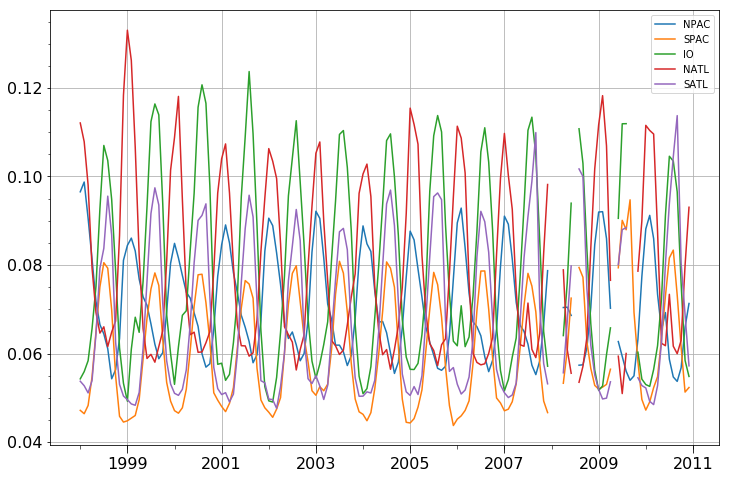

In [12]:
f, ax = pl.subplots(figsize=(12, 8))
df.plot(ax=ax);
ax.xaxis_date()
#ax.xaxis.set_major_locator(years)
#ax.xaxis.set_minor_locator(months)
ax.set_xlabel('')
ax.grid()

In [13]:
df_s.head()

,NPAC,SPAC,IO,NATL,SATL
date,,,,,
1998-01-01,2.220489,-1.033586,-1.122652,1.661351,-0.782892
1998-02-01,2.411929,-1.093656,-1.046222,1.447962,-0.841438
1998-03-01,1.700741,-0.945853,-0.931110,0.953584,-0.934423
1998-04-01,0.904660,-0.435260,-0.593231,0.008718,-0.774283
1998-05-01,0.074796,0.374101,-0.151891,-0.498271,-0.172752


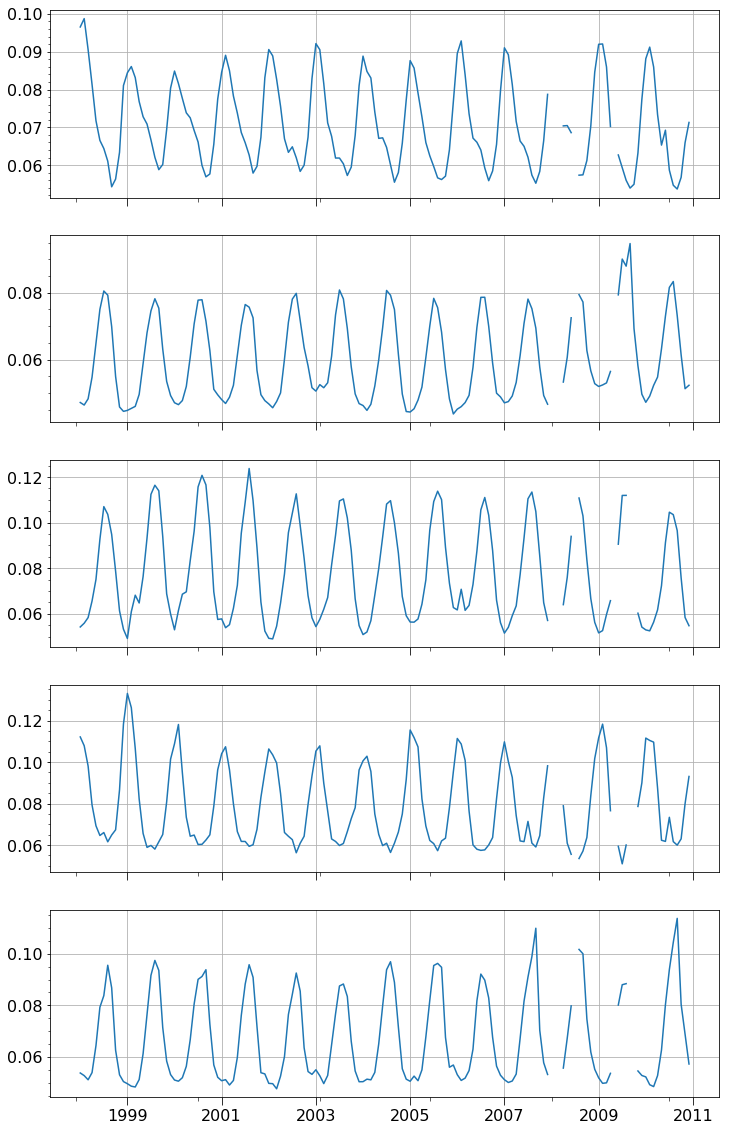

In [14]:
f, axs = pl.subplots(figsize=(12, 20), nrows=5, sharex=True)
for axi, col in zip(axs, df.columns):
    df[col].plot(ax=axi)
    #axi.xaxis_date()
    #axi.xaxis.set_major_locator(years)
    axi.xaxis.set_minor_locator(months)
    axi.set_xlabel('')
    axi.grid()

In [18]:
df.to_pickle('./pickleJar/df_raw.pkl')
df_s.to_pickle('./pickleJar/df_stdzd.pkl')